#  TP Creation de classes et modules

In [1]:
# import used packages
import numpy as np
import pickle # save and load binary files (data, model)
import matplotlib.pyplot as plt

# Set jupyter display in full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
class FileManager:
    """Import des données"""
        
    # function to import and export data from cPickle format
    def unpickle(self, file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict

    #fonction pour enregistrer un objet en .pkl
    def save_obj(self, obj, name):
        with open('export/' + name + '.pkl', 'wb') as f:
            pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    
    #import, créer les attribu data et labels
    def __init__(self, data, labels):
        self.data = self.unpickle(data)
        self.labels = self.unpickle(labels)
        
        
        
        
class DescenteGradient(FileManager):
    """Méthode de la descente de gradient"""
    
    #mettre biai = 0 si l'on ne veut pas de biai
    def __init__(self, data, labels, biai = 1):
        self.biai = biai
        FileManager.__init__(self, data, labels)
        
    #défini le model utilisé (ici une regression linéaire)
    def _model(self, x, theta2):
        y_chap=np.dot(x,theta2)
        return(y_chap)

    #défini la fonction de coût
    def _cout(self, y2 ,x, theta2):
        mc = sum((self._model(x,theta2)-y2)**2)/(2*len(y2))
        return(mc)

    #défini la dérivée de la fonction de coût pour notre modèle
    def _df(self, y2, x, theta2):
        d = np.dot((self._model(x,theta2)-y2),x)/len(y2)
        return(d)

    #permet d'ajouter ou non une colonne de 1 pour consituter le biai
    def _biai_ajout(self):
        if self.biai == 1:
            self.data = np.hstack([self.data,np.ones((self.data.shape[0],1))])

    #méthode de la descente
    def descente(self, alpha = 10**(-9), eps = 0.00001):
        self._biai_ajout()
        cout1 = 2
        cout2 = 1
        theta = np.random.random(self.data.shape[1])
        histo = []
        while np.abs(cout1-cout2)/cout2>eps:
            theta  = theta -alpha*self._df(self.labels,self.data,theta)
            cout1 = cout2
            cout2 = self._cout(self.labels,self.data,theta)
            histo.append(cout2)
        self.histo = histo
        self.theta = theta
        print(self.theta)

    #permet d'afficher l'historique de la fonction de coût
    def affichage_histo(self):
        fig, ax = plt.subplots(figsize=(16,8))
        plt.plot(range(201,len(self.histo)+1),self.histo[200:])
        plt.ylabel("coût")
        plt.xlabel("itérations")
        plt.show()
        
    #permet de predire avec un nouveau jeu de donnée 
    def predict(self, new_data):
        self.new_theta = self.model(new_data, self.theta)

In [3]:
# Importer les données dans des array numpy (2 fichiers: features et labels). Utiliser les fonctions de pickle définies plus haut. 
# Regarder les dimensions des données.
featuresFile = 'Sigma_features.pkl'
labelFile = 'Sigma_labels.pkl'

In [4]:
test = DescenteGradient(featuresFile,labelFile)

In [5]:
test.descente()

[-0.054986402965631016 0.012004622760215126 0.0730995290600586
 0.014118210791939178 0.18884273843300434 0.8559841345878625
 0.38060858077425114 0.731023366422348 0.7742497729835219
 0.18957271483957255 0.8570560739466857 0.26627650940785796
 0.7374233246869046 0.8710139225860818 0.9062862436588675
 0.10305012287638829 0.17738624445319714 0.18513737826876447
 0.600918793796206 0.7131838637947359 0.013103128152671782
 0.547445169124783 0.5532942484589061 0.9272251018708565 0.9709896621733421
 0.5819283617322962 0.9843390509560612 0.5514095466012795
 0.6947479294581388 0.3776534550423802 0.17613048110449225
 0.48977748380231195 0.828840562704371]


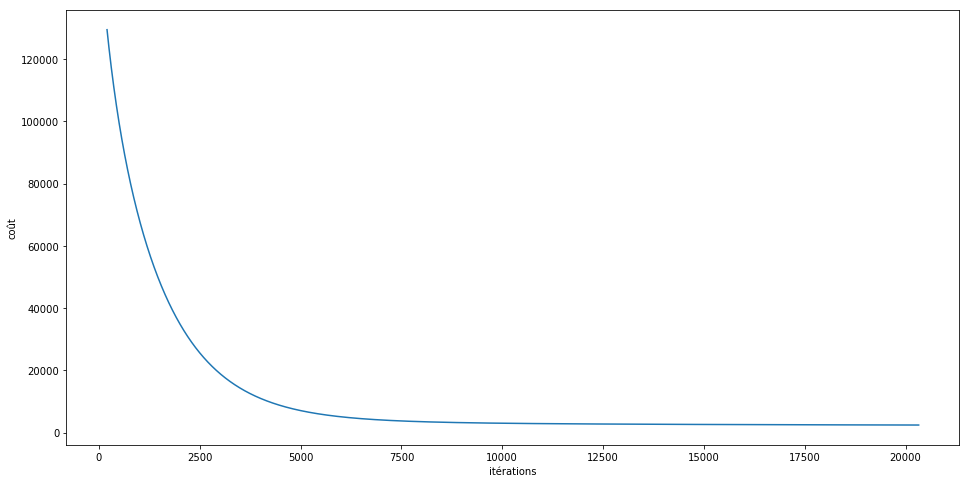

In [6]:
test.affichage_histo()